In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [45]:
pd_flats = pd.read_csv('shuffled_flats_data.csv', sep=';', header=0)

In [46]:
pd_flats

,ID,Link,Price,Rooms,Views,Square,Live Square,Kitchen,Floor,Total Floors,...,Toilet,Balcony,Repair,Window View,Ceiling,House Type,House Year,Lifts,Parking,Gas
0,246884126,https://krasnodar.cian.ru/sale/flat/246884126/,6500000,1,191,64.0,30.0,14.0,12,16,...,1 совмещенный,1 лоджия,Дизайнерский,NaN,NaN,Кирпичный,NaN,"1 пасс., 1 груз.",NaN,NaN
1,255563229,https://krasnodar.cian.ru/sale/flat/255563229/,2500000,1,6,33.0,16.6,8.2,3,8,...,1 совмещенный,1 лоджия,Евроремонт,На улицу,"2,75 м",Кирпичный,2020.0,NaN,NaN,NaN
2,256823292,https://krasnodar.cian.ru/sale/flat/256823292/,3500000,1,81,41.0,NaN,10.4,16,18,...,1 совмещенный,1 лоджия,Евроремонт,На улицу,NaN,Кирпичный,2017.0,2 пасс.,NaN,NaN
3,256729516,https://krasnodar.cian.ru/sale/flat/256729516/,2575000,1,36,30.1,16.9,6.4,5,5,...,1 совмещенный,1 балкон,Евроремонт,На улицу,"2,5 м",NaN,1973.0,NaN,NaN,Автономное
4,253172895,https://krasnodar.cian.ru/sale/flat/253172895/,11900000,3,54,118.6,66.3,17.2,10,18,...,NaN,NaN,Без ремонта,NaN,"2,9 м",Монолитно кирпичный,2020.0,"1 пасс., 1 груз.",Наземная,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,256542238,https://krasnodar.cian.ru/sale/flat/256542238/,5800000,3,33,68.3,41.8,7.7,8,12,...,1 раздельный,"1 балкон, 1 лоджия",Без ремонта,Во двор,"2,5 м",Панельный,1988.0,Есть,NaN,Центральное
5479,255196700,https://krasnodar.cian.ru/sale/flat/255196700/,1550000,0,19,20.0,8.0,4.0,2,5,...,1 совмещенный,NaN,Без ремонта,На улицу,"2,8 м",Монолитный,2021.0,Есть,Наземная,NaN
5480,257013767,https://krasnodar.cian.ru/sale/flat/257013767/,1700000,0,2,27.2,18.0,4.0,2,5,...,1 совмещенный,NaN,Косметический,Во двор,NaN,Кирпичный,2020.0,NaN,Наземная,NaN
5481,256616609,https://krasnodar.cian.ru/sale/flat/256616609/,2270000,0,41,25.0,NaN,NaN,7,9,...,1 совмещенный,1 балкон,Дизайнерский,На улицу и двор,NaN,Монолитный,2017.0,Есть,NaN,NaN


In [47]:
total = pd_flats.isnull().sum().sort_values(ascending=False)
percent = (pd_flats.isnull().sum() / pd_flats.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
District 2,5046,0.920299
Gas,4787,0.873062
Parking,4309,0.785884
Ceiling,3824,0.697428
Window View,3103,0.565931
House Year,2387,0.435346
Lifts,1894,0.345431
District,1821,0.332117
Toilet,1735,0.316433
Balcony,1524,0.277950


In [48]:
pd_flats = pd_flats.drop((missing_data[missing_data['Percent'] > 0.5]).index, 1)
pd_flats = pd_flats.drop([
    'ID', 
    'Link', 
    'Live Square', 
    'Kitchen', 
    'House Year', 
    'Description',
    'Area',
    'Street',
    'Flat number',
    'Views'
], axis=1)

In [49]:
total = pd_flats.isnull().sum().sort_values(ascending=False)
percent = (pd_flats.isnull().sum() / pd_flats.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Lifts,1894,0.345431
District,1821,0.332117
Toilet,1735,0.316433
Balcony,1524,0.277950
House Type,1092,0.199161
Repair,481,0.087726
Flat Type,0,0.000000
Total Floors,0,0.000000
Floor,0,0.000000
Square,0,0.000000


In [50]:
pd_flats['Repair'] = pd_flats['Repair'].fillna('Без ремонта')
pd_flats['House Type'] = pd_flats['House Type'].fillna('Монолитно кирпичный')
pd_flats['Balcony'] = pd_flats['Balcony'].fillna('1 балкон')
pd_flats['Toilet'] = pd_flats['Toilet'].fillna('1 совмещенный')
pd_flats['District'] = pd_flats['District'].fillna('No info')
pd_flats['Lifts'] = pd_flats['Lifts'].fillna('Нет')

In [51]:
pd_flats.isnull().sum().max()

0

In [52]:
print(*['{} {}'.format(feature, pd_flats[feature].dtype) for feature in pd_flats.keys()], sep='\n')

Price int64
Rooms int64
Square float64
Floor int64
Total Floors int64
District object
Flat Type object
Toilet object
Balcony object
Repair object
House Type object
Lifts object


In [53]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['District', 'Flat Type', 'Toilet', 'Balcony', 'Repair', 'House Type', 'Lifts']

for categorical in categorical_features:
    label = LabelEncoder()
    label.fit(list(pd_flats[categorical].values))
    pd_flats[categorical] = label.transform(list(pd_flats[categorical].values))

print('Shape', pd_flats.shape)

Shape (5483, 12)


In [54]:
pd_flats.head(10)

,Price,Rooms,Square,Floor,Total Floors,District,Flat Type,Toilet,Balcony,Repair,House Type,Lifts
0,6500000,1,64.0,12,16,45,0,1,4,1,3,0
1,2500000,1,33.0,3,8,35,0,1,4,2,3,33
2,3500000,1,41.0,16,18,21,0,1,4,2,3,12
3,2575000,1,30.1,5,5,45,0,1,0,2,4,33
4,11900000,3,118.6,10,18,0,0,1,0,0,4,0
5,5900000,3,80.0,3,16,20,0,0,0,3,5,33
6,9000000,1,62.0,20,22,47,0,1,4,0,5,0
7,2520000,0,21.0,8,9,37,0,1,0,1,4,0
8,4500000,3,62.0,8,16,39,0,1,0,2,5,27
9,2600000,1,45.0,3,3,0,0,0,0,3,5,33


In [55]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(pd_flats['Price'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.8038777 ]
 [-0.78519678]
 [-0.76511479]
 [-0.76495912]
 [-0.7571754 ]
 [-0.75561866]
 [-0.74160797]
 [-0.74160797]
 [-0.73382426]
 [-0.73071077]]

outer range (high) of the distribution:
[[ 6.9253519 ]
 [ 6.9253519 ]
 [ 6.9253519 ]
 [ 7.23670052]
 [ 7.70372346]
 [ 7.70372346]
 [ 8.48209502]
 [ 8.48209502]
 [10.8172097 ]
 [11.59558126]]


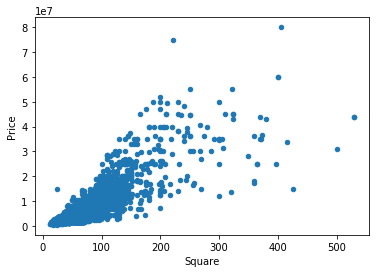

In [56]:
var = 'Square'
data = pd.concat([pd_flats['Price'], pd_flats[var]], axis=1)
data.plot.scatter(x=var, y='Price')

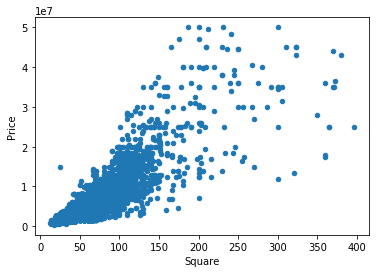

In [57]:
pd_flats = pd_flats.drop(pd_flats[(pd_flats['Square']>400) | (pd_flats['Price']>50000000)].index)

#Check the graphic again
var = 'Square'
data = pd.concat([pd_flats['Price'], pd_flats[var]], axis=1)
data.plot.scatter(x=var, y='Price')

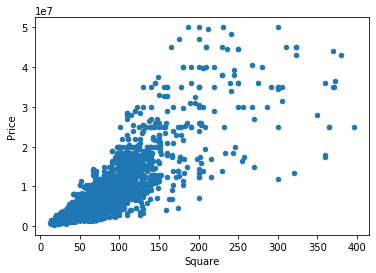

In [58]:
pd_flats = pd_flats.drop(pd_flats[(pd_flats['Square']<50) & (pd_flats['Price']>10000000)].index)

#Check the graphic again
var = 'Square'
data = pd.concat([pd_flats['Price'], pd_flats[var]], axis=1)
data.plot.scatter(x=var, y='Price')

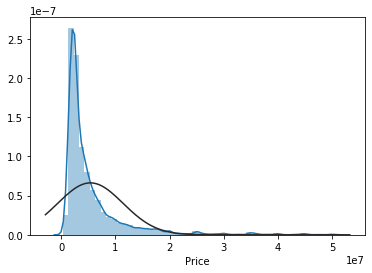

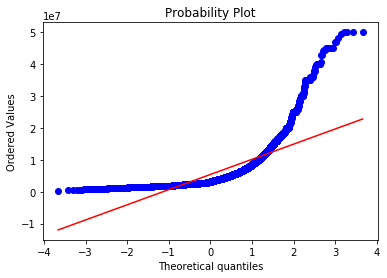

In [59]:
sns.distplot(pd_flats['Price'], fit=norm)
fig = plt.figure()
res = stats.probplot(pd_flats['Price'], plot=plt)

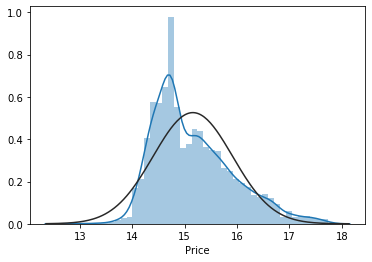

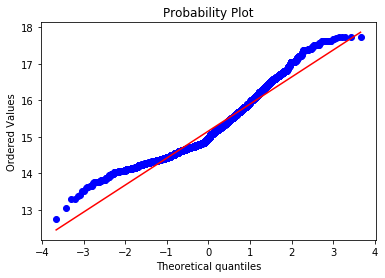

In [60]:
pd_flats['Price'] = np.log(pd_flats['Price'])

sns.distplot(pd_flats['Price'], fit=norm)
fig = plt.figure()
res = stats.probplot(pd_flats['Price'], plot=plt)

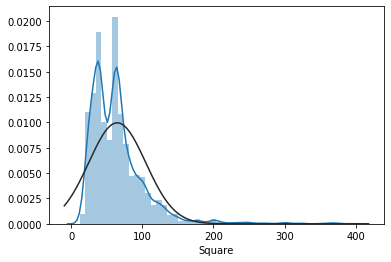

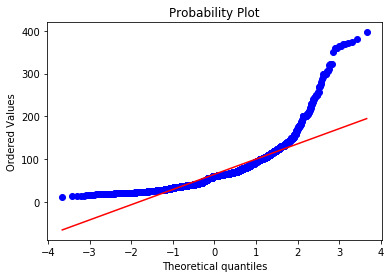

In [61]:
sns.distplot(pd_flats['Square'], fit=norm)
fig = plt.figure()
res = stats.probplot(pd_flats['Square'], plot=plt)

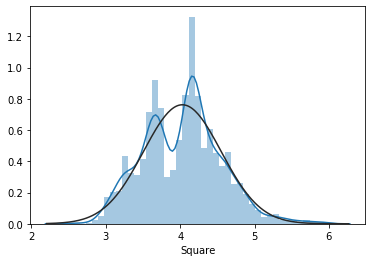

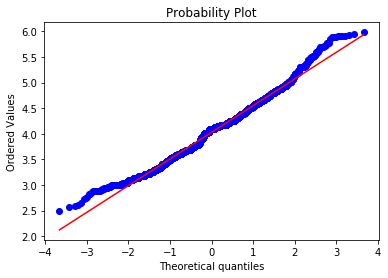

In [62]:
pd_flats['Square'] = np.log(pd_flats['Square'])

sns.distplot(pd_flats['Square'], fit=norm)
fig = plt.figure()
res = stats.probplot(pd_flats['Square'], plot=plt)

In [63]:
pd_flats = pd.get_dummies(pd_flats)

In [65]:
ntrain = int(len(pd_flats) * 0.85)

train = pd_flats[:ntrain]
test = pd_flats[ntrain:]

In [66]:
train.head()

,Price,Rooms,Square,Floor,Total Floors,District,Flat Type,Toilet,Balcony,Repair,House Type,Lifts
0,15.687313,1,4.158883,12,16,45,0,1,4,1,3,0
1,14.731801,1,3.496508,3,8,35,0,1,4,2,3,33
2,15.068274,1,3.713572,16,18,21,0,1,4,2,3,12
3,14.761360,1,3.404525,5,5,45,0,1,0,2,4,33
4,16.292049,3,4.775756,10,18,0,0,1,0,0,4,0


In [68]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [69]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [16]:
np_flats = pd_flats.to_numpy()

In [17]:
np_flats[:10]

array([[6.500e+06, 1.000e+00, 6.400e+01, 1.200e+01, 1.600e+01, 4.500e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 0.000e+00],
       [2.500e+06, 1.000e+00, 3.300e+01, 3.000e+00, 8.000e+00, 3.500e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 3.300e+01],
       [3.500e+06, 1.000e+00, 4.100e+01, 1.600e+01, 1.800e+01, 2.100e+01,
        0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.200e+01],
       [2.575e+06, 1.000e+00, 3.010e+01, 5.000e+00, 5.000e+00, 4.500e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00, 3.300e+01],
       [1.190e+07, 3.000e+00, 1.186e+02, 1.000e+01, 1.800e+01, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00],
       [5.900e+06, 3.000e+00, 8.000e+01, 3.000e+00, 1.600e+01, 2.000e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 3.300e+01],
       [9.000e+06, 1.000e+00, 6.200e+01, 2.000e+01, 2.200e+01, 4.700e+01,
        0.000e+00, 1.000e+00, 4.

In [18]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(np_flats, test_size=0.15, random_state=123)

In [19]:
print('Data Train shape: {}\nData Test shape: {}'.format(data_train.shape, data_test.shape))

Data Train shape: (4660, 12)
Data Test shape: (823, 12)


In [20]:
y_train, X_train = data_train[:, 0], data_train[:, 1:]
y_test, X_test = data_test[:, 0], data_test[:, 1:]

In [21]:
print(y_train[0], ' <-> ', X_train[0])

2900000.0  <->  [ 2.  44.5  8.   9.  21.   0.   0.   0.   3.   4.  31. ]


In [30]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [32]:
k = 4
num_val_samples = len(X_train) // 4
num_epochs = 100
all_mae_histories = []
all_scores = []

for i in range(k):
    print('processing fold №', i)
    val_data = X_train[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [
            X_train[:i * num_val_samples], 
            X_train[(i+1) * num_val_samples:]
        ], 
        axis=0
    )
    partial_train_targets = np.concatenate(
        [
            y_train[:i * num_val_samples], 
            y_train[(i+1) * num_val_samples:]
        ], 
        axis=0
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data =(val_data, val_targets),
        epochs=num_epochs, 
        batch_size=1, 
        verbose=0
    )
    print(history.history.keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold № 0
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold № 1
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold № 2
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
processing fold № 3
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [33]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

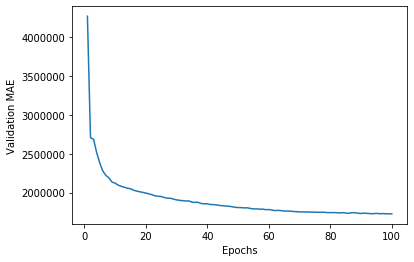

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [36]:
average_mae_history[-1]

1725829.875

In [23]:
mean = X_train.mean(axis=0)
X_train -= mean
X_test -= mean
std = X_train.std(axis=0)
X_train /= std
X_test /= std

In [69]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [78]:
model.fit(X_train, y_train, epochs=500, batch_size=512, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 818us/step - loss: 10582547759104.0000 - mae: 1750383.8750


In [79]:
test_mae_score

1750383.875